# HW1: Logistic Regression.

### Name: [Daksh Bhuva]


#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also you should plot their objective values versus epochs and compare their training and testing accuracies. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [26]:
# Load Packages

import pandas as pd
import numpy as np

# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [27]:
dataset = pd.read_csv('/content/data.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 1.2 Examine and clean data

In [28]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.

dataset.drop(dataset.columns[len(dataset.columns)-1], axis=1, inplace=True)
dataset.drop(dataset.columns[0], axis=1, inplace=True)
dataset.diagnosis = dataset.diagnosis.map({"B": 1, "M": -1})
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 1.3. Partition to training and testing sets

In [29]:
# y is the Target attribute 'diagnosis' and X is rest of the attributes

dvalues = dataset.values
X, y = dvalues[:, 1:], dvalues[:, 0:1]

In [30]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machinel learning.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## 1.4. Feature scaling

Use the standardization to trainsform both training and test features

In [31]:
# Standardization
import numpy

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = numpy.mean(x_train, axis=0).reshape(1, d)
sig = numpy.std(x_train, axis=0).reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(numpy.mean(x_test, axis=0))

print('test std = ')
print(numpy.std(x_test, axis=0))

test mean = 
[ 0.02090745  0.16431943  0.03098111  0.01492717 -0.01921133  0.10117201
  0.08443932  0.02966041  0.04062134  0.09494587  0.04653776  0.06428674
  0.10007498  0.00538732  0.06601984  0.11839521  0.0676146   0.1268942
  0.01037956  0.16193656  0.01337734  0.1134187   0.03390329 -0.00517026
 -0.02001553  0.07842781  0.11756424  0.01212816 -0.02700714  0.12744666]
test std = 
[0.98484027 1.15221324 0.99783436 0.91061412 1.0932457  1.2099472
 1.1161288  1.0269985  1.00338544 1.16387855 0.86929628 1.0858163
 0.95737985 0.73797557 1.25342805 1.10484161 0.84117872 1.20913453
 1.04276269 1.05856313 0.94112163 1.03290181 0.96071251 0.84629366
 1.04566915 1.12995399 1.20449902 1.03206998 0.90827971 1.06240744]


# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistric regression and when $\lambda > 0$, it essentially becomes a regularized logistric regression.

In [32]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)

def objective(w, x, y, lam):
    expTerm = np.exp((-(np.dot(np.multiply(y, x), w))))
    logTerm = np.log(1 + expTerm)

    return np.mean(logTerm) + (lam/2 * np.sum(w*w))
    pass

# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [33]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):
    n, d = x.shape
    numerator = np.multiply(y, x)
    denominator = 1 + np.exp(((np.dot(np.multiply(y, x), w))))
    meanTerm = np.divide(numerator, denominator)

    return -np.mean(meanTerm, axis=0).reshape(d, 1) + lam*w 
    pass

In [34]:
# Gradient descent for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, w, max_epoch=100):
    n, d = x.shape
    objvals = numpy.zeros(max_epoch)
    
    for i in range(max_epoch):
        objval = objective(w, x, y, lam)
        objvals[i] = objval
        print('Objective value at ' + str(i+1) + ' is ' + str(objval))
        gradientTerm = gradient(w, x, y, lam)
        w = w - learning_rate * gradientTerm
    
    return w, objvals
    pass

Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [64]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.

lam = 0
learning_rate = 1
w = np.zeros((d, 1))

w_gd, objvals_gd = gradient_descent(x_train, y_train, lam, learning_rate, w)

Objective value at 1 is 0.6931471805599453
Objective value at 2 is 0.1736337296064684
Objective value at 3 is 0.13863877872989974
Objective value at 4 is 0.12288413006561809
Objective value at 5 is 0.11576613492616913
Objective value at 6 is 0.11099019308816198
Objective value at 7 is 0.10717885662856941
Objective value at 8 is 0.10396949092070193
Objective value at 9 is 0.10119870557399414
Objective value at 10 is 0.09876897867939638
Objective value at 11 is 0.09661369678769466
Objective value at 12 is 0.09468412359097389
Objective value at 13 is 0.09294316237442035
Objective value at 14 is 0.09136183064631986
Objective value at 15 is 0.08991704767563728
Objective value at 16 is 0.08859015119945056
Objective value at 17 is 0.08736585870901725
Objective value at 18 is 0.08623151738983048
Objective value at 19 is 0.08517654982524114
Objective value at 20 is 0.08419203673857761
Objective value at 21 is 0.08327039802143471
Objective value at 22 is 0.08240514564272644
Objective value at 23

In [36]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.

lam = 0.0001
learning_rate = 1
w = np.zeros((d, 1))

w_gd_regularized, objvals_gd_regularized = gradient_descent(x_train, y_train, lam, learning_rate, w)

Objective value at 1 is 0.6931471805599453
Objective value at 2 is 0.17373075003835395
Objective value at 3 is 0.13874590240831533
Objective value at 4 is 0.12300803297716084
Objective value at 5 is 0.11590597229060243
Objective value at 6 is 0.11114405534689033
Objective value at 7 is 0.1073455650071604
Objective value at 8 is 0.10414818231634433
Objective value at 9 is 0.10138869528550187
Objective value at 10 is 0.098969698632984
Objective value at 11 is 0.09682466165724318
Objective value at 12 is 0.09490491016451823
Objective value at 13 is 0.09317339603865071
Objective value at 14 is 0.09160117601453352
Objective value at 15 is 0.09016520178393278
Objective value at 16 is 0.08884683838130639
Objective value at 17 is 0.08763082661748482
Objective value at 18 is 0.08650453383526606
Objective value at 19 is 0.08545740021181764
Objective value at 20 is 0.08448052195268194
Objective value at 21 is 0.08356633266906562
Objective value at 22 is 0.08270835656172436
Objective value at 23 i

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [37]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
    d = xi.shape[0]
    expTerm = float(np.dot(yi * xi, w))
    logTerm = np.log(1 + np.exp(-expTerm)) 
    obj = logTerm + lam/2 * np.sum(w*w) 
    
    gTerm = -(yi * xi).T / (1 + np.exp(expTerm)) 
    g = gTerm + lam * w
    
    return obj, g
    pass

Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [38]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, w, max_epoch=100):
    n, d = x.shape
    objvals = np.zeros(max_epoch) 
    
    for i in range(max_epoch):
        
        rand_indices = numpy.random.permutation(n)
        x_rand = x[rand_indices, :]
        y_rand = y[rand_indices, :]
        objval = 0 
        for j in range(n):
            xi = x_rand[j, :].reshape((1,d))
            yi = float(y_rand[j, :]) 
            obj, g = stochastic_objective_gradient(w, xi, yi, lam)
            objval = objval + obj
            w = w - learning_rate * g
        
        learning_rate = learning_rate * 0.9
        objval = objval/n
        objvals[i] = objval
        print('Objective value at epoch ' + str(i+1) + ' is ' + str(objval))
    
    return w, objvals
    pass

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [39]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.

lam = 0
learning_rate = 0.1
w = numpy.zeros((d,1))

w_sgd, objvals_sgd = sgd(x_train, y_train, lam, learning_rate, w)

Objective value at epoch 1 is 0.11324245139722891
Objective value at epoch 2 is 0.0728534473423762
Objective value at epoch 3 is 0.06490444631443364
Objective value at epoch 4 is 0.06180933020744074
Objective value at epoch 5 is 0.0594313690783196
Objective value at epoch 6 is 0.05870820214340375
Objective value at epoch 7 is 0.056890696846319755
Objective value at epoch 8 is 0.0559987657844674
Objective value at epoch 9 is 0.054949744140390985
Objective value at epoch 10 is 0.05408081428929107
Objective value at epoch 11 is 0.053689682653091236
Objective value at epoch 12 is 0.05253419094947232
Objective value at epoch 13 is 0.052895009813742976
Objective value at epoch 14 is 0.05222493264001225
Objective value at epoch 15 is 0.051716907479316225
Objective value at epoch 16 is 0.05159276948588305
Objective value at epoch 17 is 0.051264259893958546
Objective value at epoch 18 is 0.050975339038356444
Objective value at epoch 19 is 0.050723436325672396
Objective value at epoch 20 is 0.05

In [62]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.

lam = 0.0001
learning_rate = 0.1
w = numpy.zeros((d,1))

w_sgd_regularized, objvals_sgd_regularized = sgd(x_train, y_train, lam, learning_rate, w)

Objective value at epoch 1 is 0.11163339211294143
Objective value at epoch 2 is 0.07218657716484639
Objective value at epoch 3 is 0.06541293950669302
Objective value at epoch 4 is 0.06321257488732199
Objective value at epoch 5 is 0.06047657145813814
Objective value at epoch 6 is 0.05976227869542712
Objective value at epoch 7 is 0.05740348104170829
Objective value at epoch 8 is 0.056957199834313674
Objective value at epoch 9 is 0.05592425606606097
Objective value at epoch 10 is 0.055792098138796264
Objective value at epoch 11 is 0.05468006825252707
Objective value at epoch 12 is 0.05444986334449083
Objective value at epoch 13 is 0.053886449742748095
Objective value at epoch 14 is 0.05355837274798023
Objective value at epoch 15 is 0.053041021629771916
Objective value at epoch 16 is 0.052783857580372386
Objective value at epoch 17 is 0.05273282857957945
Objective value at epoch 18 is 0.05240986463698108
Objective value at epoch 19 is 0.05208618467560232
Objective value at epoch 20 is 0.05

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [41]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: b-by-d matrix
#     yi: label:  b-by-1 matrix
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):
    n,d = xi.shape
    expTerm = np.dot(yi * xi, w) 
    
    logTerm = np.log(1 + np.exp(-expTerm)) 
    obj = np.mean(logTerm) + lam/2 * np.sum(w*w) 

    gTerm = - np.mean(np.divide(yi * xi, 1 + np.exp(expTerm)), axis = 0).reshape(d,1) 
    g = gTerm + lam * w 
    
    return obj, g
    pass

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [42]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate, w, max_epoch=100):
    n, d = x.shape
    batch_size = 10
    objvals = numpy.zeros(max_epoch)
    
    for i in range(max_epoch):
        rand_indices = numpy.random.permutation(n)
        x_rand = x[rand_indices, :]
        y_rand = y[rand_indices, :]
        
        objval = 0 
        for j in range(0, n, batch_size):
            xi = x_rand[j:j+batch_size, :] 
            yi = y_rand[j:j+batch_size, :] 
            obj, g = mb_objective_gradient(w, xi, yi, lam)
            objval = objval + obj
            w = w - learning_rate * g
        
        learning_rate = learning_rate * 0.9 
        objval /= n/batch_size
        objvals[i] = objval
        print('Objective value at epoch ' + str(i+1) + ' is ' + str(objval))
    
    return w, objvals
    pass

Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [43]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.

lam = 0
learning_rate = 1
w = numpy.zeros((d, 1))

w_mbgd, objvals_mbgd = mbgd(x_train, y_train, lam, learning_rate, w)

Objective value at epoch 1 is 0.14165592533368002
Objective value at epoch 2 is 0.07397264716433943
Objective value at epoch 3 is 0.06694274561640264
Objective value at epoch 4 is 0.06270078140419523
Objective value at epoch 5 is 0.06132557276989168
Objective value at epoch 6 is 0.059387756202411476
Objective value at epoch 7 is 0.05762534832698657
Objective value at epoch 8 is 0.05611777567848969
Objective value at epoch 9 is 0.05548675778415022
Objective value at epoch 10 is 0.05430036897183852
Objective value at epoch 11 is 0.053980227211386955
Objective value at epoch 12 is 0.053303361545874436
Objective value at epoch 13 is 0.052741221062820906
Objective value at epoch 14 is 0.05246055070451647
Objective value at epoch 15 is 0.05166977162888939
Objective value at epoch 16 is 0.05153377474602657
Objective value at epoch 17 is 0.05137573941784474
Objective value at epoch 18 is 0.0513029920987331
Objective value at epoch 19 is 0.0514002228647327
Objective value at epoch 20 is 0.05082

In [44]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.

lam = 0.0001
learning_rate = 1
w = numpy.zeros((d, 1))

w_mbgd_regularized, objvals_mbgd_regularized = mbgd(x_train, y_train, lam, learning_rate, w)

Objective value at epoch 1 is 0.10751298724933993
Objective value at epoch 2 is 0.071912381853286
Objective value at epoch 3 is 0.0636318340793177
Objective value at epoch 4 is 0.06341312606296094
Objective value at epoch 5 is 0.06117232658365274
Objective value at epoch 6 is 0.05983695982651986
Objective value at epoch 7 is 0.056970336955482426
Objective value at epoch 8 is 0.05643061984550533
Objective value at epoch 9 is 0.05634220883887406
Objective value at epoch 10 is 0.05540613889915087
Objective value at epoch 11 is 0.05584173891213767
Objective value at epoch 12 is 0.05441851257246285
Objective value at epoch 13 is 0.05395284699087037
Objective value at epoch 14 is 0.05325308778676249
Objective value at epoch 15 is 0.052965480175561075
Objective value at epoch 16 is 0.052717192324914244
Objective value at epoch 17 is 0.0525013848333102
Objective value at epoch 18 is 0.05234308794155378
Objective value at epoch 19 is 0.0531222545228306
Objective value at epoch 20 is 0.052058595

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

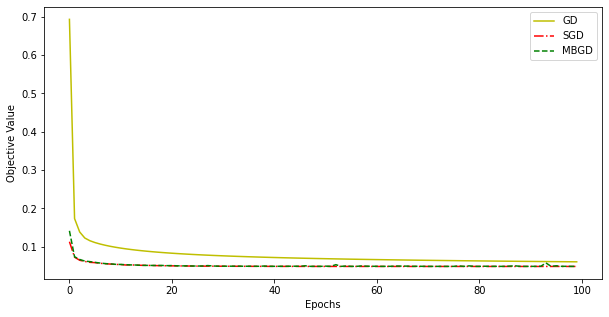

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 5))

line1, = plt.plot(range(len(objvals_gd)), objvals_gd, 'y')
line2, = plt.plot(range(len(objvals_sgd)), objvals_sgd, '-.r')
line3, = plt.plot(range(len(objvals_mbgd)), objvals_mbgd, '--g')

plt.xlabel('Epochs')
plt.ylabel('Objective Value')
plt.legend([line1, line2, line3], ['GD', 'SGD', 'MBGD'])
plt.show()

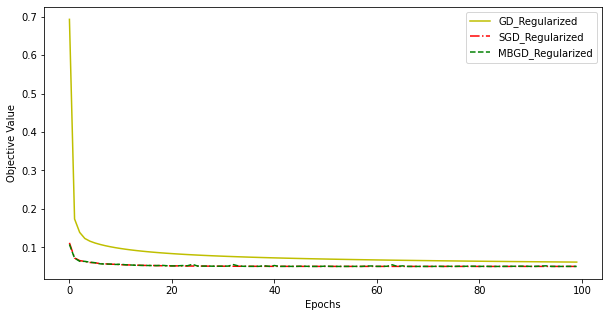

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 5))

line4, = plt.plot(range(len(objvals_gd_regularized)), objvals_gd_regularized, 'y')
line5, = plt.plot(range(len(objvals_sgd_regularized)), objvals_sgd_regularized, '-.r')
line6, = plt.plot(range(len(objvals_mbgd_regularized)), objvals_mbgd_regularized, '--g')

plt.xlabel('Epochs')
plt.ylabel('Objective Value')
plt.legend([line4, line5, line6], ['GD_Regularized', 'SGD_Regularized', 'MBGD_Regularized'])
plt.show()

# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [47]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    xw = numpy.dot(X, w)
    f = numpy.sign(xw)
    return f
    pass

### Training and Testing classification error of Gradient Descent

In [48]:
f_train = predict(w_gd, x_train)
diff = numpy.abs(f_train - y_train) / 2
error_train = numpy.mean(diff)
print('Training classification error is ' + str(error_train))

f_test = predict(w_gd, x_test)
diff = numpy.abs(f_test - y_test) / 2
error_test = numpy.mean(diff)
print('Test classification error is ' + str(error_test))

Training classification error is 0.01098901098901099
Test classification error is 0.043859649122807015


### Training and Testing classification error of Gradient Descent Regularized

In [49]:
f_train = predict(w_gd_regularized, x_train)
diff = numpy.abs(f_train - y_train) / 2
error_train = numpy.mean(diff)
print('Training classification error is ' + str(error_train))

f_test = predict(w_gd_regularized, x_test)
diff = numpy.abs(f_test - y_test) / 2
error_test = numpy.mean(diff)
print('Test classification error is ' + str(error_test))

Training classification error is 0.01098901098901099
Test classification error is 0.043859649122807015


### Training and Testing classification error of Stochastic Gradient Descent

In [50]:
f_train = predict(w_sgd, x_train)
diff = numpy.abs(f_train - y_train) / 2
error_train = numpy.mean(diff)
print('Training classification error is ' + str(error_train))

f_test = predict(w_sgd, x_test)
diff = numpy.abs(f_test - y_test) / 2
error_test = numpy.mean(diff)
print('Test classification error is ' + str(error_test))

Training classification error is 0.008791208791208791
Test classification error is 0.03508771929824561


### Training and Testing classification error of Stochastic Gradient Descent Regularized

In [51]:
f_train = predict(w_sgd_regularized, x_train)
diff = numpy.abs(f_train - y_train) / 2
error_train = numpy.mean(diff)
print('Training classification error is ' + str(error_train))

f_test = predict(w_sgd_regularized, x_test)
diff = numpy.abs(f_test - y_test) / 2
error_test = numpy.mean(diff)
print('Test classification error is ' + str(error_test))

Training classification error is 0.013186813186813187
Test classification error is 0.043859649122807015


### Training and Testing classification error of Mini-Batch Gradient Descent

In [52]:
f_train = predict(w_mbgd, x_train)
diff = numpy.abs(f_train - y_train) / 2
error_train = numpy.mean(diff)
print('Training classification error is ' + str(error_train))

f_test = predict(w_mbgd, x_test)
diff = numpy.abs(f_test - y_test) / 2
error_test = numpy.mean(diff)
print('Test classification error is ' + str(error_test))

Training classification error is 0.01098901098901099
Test classification error is 0.03508771929824561


### Training and Testing classification error of Mini-Batch Gradient Descent Regularized

In [53]:
f_train = predict(w_mbgd_regularized, x_train)
diff = numpy.abs(f_train - y_train) / 2
error_train = numpy.mean(diff)
print('Training classification error is ' + str(error_train))

f_test = predict(w_mbgd_regularized, x_test)
diff = numpy.abs(f_test - y_test) / 2
error_test = numpy.mean(diff)
print('Test classification error is ' + str(error_test))

Training classification error is 0.008791208791208791
Test classification error is 0.03508771929824561


# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)